## Importing Packages

In [2]:
#!pip install Pulp

  Using cached PuLP-2.6.0-py3-none-any.whl (14.2 MB)


In [29]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pulp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Initialize seaborn (for plotting)
sns.set()

## Loading and Inspecting Data

In [30]:
#Centers

dfCenters= pd.read_csv("centers.csv",index_col=0)
dfCenters

,Opening Costs,Operating Costs,Num MPs,2022 Current Worker Max Hours,Maximum capacity,2022 Costs
Center,,,,,,
Center A,0,275000,215,322500,5000000,275000
Center B,0,275000,125,187500,5000000,275000
Center C,0,275000,100,150000,5000000,275000
Center D,0,285000,120,180000,5000000,285000
Center E,250000,125000,0,0,5000000,375000
Center F,100000,175000,0,0,5000000,275000


In [31]:
#Demand by Region in a given year

dfDemand = pd.read_csv("demands.csv")
dfDemand

,Year,Region,Demand
0,2012,Downtown Toronto,249581
1,2012,East York,172730
2,2012,Etobicoke,285764
3,2012,Mississauga East,255427
4,2012,North Toronto,263276
...,...,...,...
65,2021,Etobicoke,445369
66,2021,Mississauga East,395768
67,2021,North Toronto,406148
68,2021,North York,494386


In [32]:
# Average Distance between customers and medical centers

dfDistance = pd.read_csv("distances.csv")
dfDistance

,Center,Region,Distance,2022 Cost
0,Center A,Downtown Toronto,25.77,2.2925
1,Center A,East York,2.24,-3.5900
2,Center A,Etobicoke,25.72,2.2800
3,Center A,Mississauga East,28.65,3.0125
4,Center A,North Toronto,11.64,-1.2400
5,Center A,North York,0.00,-4.1500
6,Center A,Scarborough East,19.76,0.7900
7,Center B,Downtown Toronto,29.88,3.3200
8,Center B,East York,16.04,-0.1400
9,Center B,Etobicoke,31.11,3.6275


## Demand Visualizations

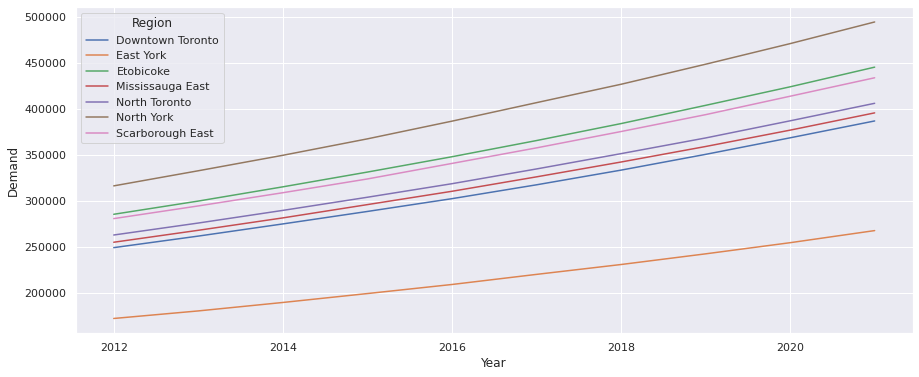

In [33]:
#plotting year vs demand to see that its quite linear, so linear regression would fit fine
plt.figure(figsize=(15,6))
sns.lineplot(x="Year", y="Demand", hue="Region",data=dfDemand)
plt.show()

## Demand Forecast

### Region Forecast

In [34]:
regions = list(dfDemand["Region"].unique())
regions

['Downtown Toronto',
 'East York',
 'Etobicoke',
 'Mississauga East',
 'North Toronto',
 'North York',
 'Scarborough East']

In [35]:
def demandforecast(regionlist,dfDemand):
    for i in regionlist:
        regiondemand= dfDemand[dfDemand["Region"]==i]
        x= regiondemand[["Year","Region"]]
        x=x.set_index("Region")

        y=regiondemand["Demand"]

        #split into train and test set
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
        
        #create a linear model
        LR= LinearRegression()
        LR.fit(x_train,y_train)
        
        print(i)
        print('intercept:', LR.intercept_)
        print('Coefficients:', LR.coef_)

        y_pred= LR.predict(x_test)
        print("R-Squared Score:", r2_score(y_test, y_pred))
        print("MSE", mean_squared_error(y_test,y_pred))
        
        print("2022 Prediction:",LR.predict([[2022]]))
        print("2023 Prediction:",LR.predict([[2023]]))      
        print("2024 Prediction:",LR.predict([[2024]]))
        print()
        
demandforecast(regions,dfDemand)

Downtown Toronto
intercept: -30344040.439655177
Coefficients: [15203.18965517]
R-Squared Score: 0.9982733383109014
MSE 4906268.3199233245
2022 Prediction: [396809.04310345]
2023 Prediction: [412012.23275862]
2024 Prediction: [427215.42241379]

East York
intercept: -21116821.560344834
Coefficients: [10579.56034483]
R-Squared Score: 0.9991694036604655
MSE 1137270.7886855844
2022 Prediction: [275049.45689655]
2023 Prediction: [285629.01724138]
2024 Prediction: [296208.57758621]

Etobicoke
intercept: -35341031.965517245
Coefficients: [17704.46551724]
R-Squared Score: 0.9989150283422366
MSE 4166730.4068225957
2022 Prediction: [457397.31034482]
2023 Prediction: [475101.77586207]
2024 Prediction: [492806.24137931]

Mississauga East
intercept: -31048203.517241377
Coefficients: [15556.26724138]
R-Squared Score: 0.9990160139557451
MSE 2903838.2396267196
2022 Prediction: [406568.84482759]
2023 Prediction: [422125.11206897]
2024 Prediction: [437681.37931035]

North Toronto
intercept: -31597008.232

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, 

With a 99% R2 score for each region, we can be very confident that the linear regression produces a very accurate forecast of the future demand

In [36]:
newdemand= pd.read_csv("finaldemand.csv")

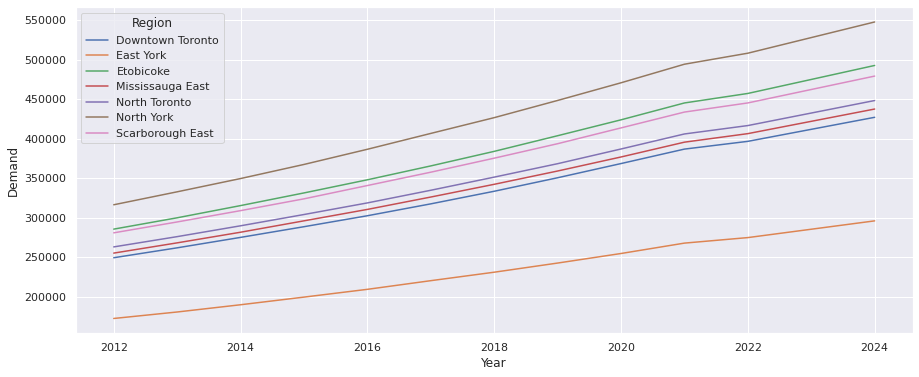

In [37]:
plt.figure(figsize=(15,6))
sns.lineplot(x="Year", y="Demand", hue="Region",data=newdemand)
plt.show()

## Simple Deterministic Model - One Year

### Demand Filtering

In [38]:
#filter for only 2022 demand

demand2022 = newdemand[newdemand["Year"].isin([2022])]
demand2022=demand2022.drop('Year',axis=1)
demand2022=demand2022.set_index("Region")
demand2022

,Demand
Region,
Downtown Toronto,396809.0431
East York,275049.4569
Etobicoke,457397.3103
Mississauga East,406568.8448
North Toronto,416777.4052
North York,508320.0603
Scarborough East,445407.4741


### Sets

In [39]:
#Centers

centers = list(dfCenters.index)
numcenters=len(centers)

#Regions
regions = list(dfDemand["Region"].unique())
numregions= len(regions)

### Parameters

In [40]:
#parameters
#demand in each region (dictionary)
regiondemand={}
for j in regions:
    regiondemand[j]=float(demand2022.loc[j]["Demand"])
regiondemand

#center capcacity (dictionary)
centercapacity={}
for i in centers:
    centercapacity[i]=int(dfCenters.loc[i]["Maximum capacity"])
    
#center costs (dictionary)
centercosts={}
for i in centers:
    centercosts[i]=float(dfCenters.loc[i]["2022 Costs"])
    
#worker cost per center-region (dictionary)
centerregioncost={}
for i in centers:
    for j in regions:
        centerregioncost[(i,j)] = float(dfDistance[(dfDistance["Center"]==i)&(dfDistance["Region"]==j)]["2022 Cost"])


#worker cost per center-region (dictionary)
centerregioncost={}
for i in centers:
    for j in regions:
        centerregioncost[(i,j)] = float(((dfDistance[(dfDistance["Center"]==i)&(dfDistance["Region"]==j)]["Distance"]*0.5)+37.85)-42)

    

In [273]:
dfDistance

,Center,Region,Distance,2022 Cost
0,Center A,Downtown Toronto,25.77,2.2925
1,Center A,East York,2.24,-3.5900
2,Center A,Etobicoke,25.72,2.2800
3,Center A,Mississauga East,28.65,3.0125
4,Center A,North Toronto,11.64,-1.2400
5,Center A,North York,0.00,-4.1500
6,Center A,Scarborough East,19.76,0.7900
7,Center B,Downtown Toronto,29.88,3.3200
8,Center B,East York,16.04,-0.1400
9,Center B,Etobicoke,31.11,3.6275


### Variables

In [41]:
#variables: if a center is opened/allocated
yvar = pulp.LpVariable.dict("y", centers, cat=pulp.LpBinary)

#variables: amount of demand from each region allocated to center, per scenario
xvar = pulp.LpVariable.dict("x", (centers, regions), lowBound=0.0, cat=pulp.LpContinuous)


### Model Initialization

In [42]:
#initialie model and objective sense

locationModel = pulp.LpProblem(name="LocationModel", sense=pulp.LpMinimize)

locationModel

LocationModel:
MINIMIZE
None
VARIABLES

### Constraints

In [43]:
#Constraint: demand does not necessarily need to be satisfied in all scenarios

for j in regions:
    locationModel += pulp.lpSum( [xvar[(i,j)] for i in centers] ) <= regiondemand[j]

    
# Constraint: center capacities must be observed in all scenarios
for i in centers:        
    locationModel += pulp.lpSum( [xvar[(i,j)] for j in regions] ) <= centercapacity[i] * yvar[i]   

# Constraint: the sum of center capacity must equte or be less then the total number of currently hired workers maximum working hours

HPSum2022=dfCenters['2022 Current Worker Max Hours'].sum()
locationModel  += pulp.lpSum( [xvar[(i,j)] for i in  centers for j in regions]) <=HPSum2022

# Constraint: Centers A-D must remain open and operating as closing would be to expensive

locationModel += pulp.lpSum(yvar[i] for i in centers[0:4]) == 4




### Objective Functions

In [44]:

# --- center allocation costs (opening and annual fees)
obj = pulp.lpSum([ centercosts[i] * yvar[i] for i in centers])

# --- worker flow costs/revenue
obj += pulp.lpSum( [centerregioncost[(i,j)] * xvar[(i,j)] for i in centers for j in regions ] )

# add objective to model
locationModel += obj

### Solution Process

In [45]:
# Solve model
locationModel.solve()
print("Status:", pulp.LpStatus[locationModel.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/27b4871876fb4c6e893a3688687b7e54-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/27b4871876fb4c6e893a3688687b7e54-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 20 COLUMNS
At line 217 RHS
At line 233 BOUNDS
At line 240 ENDATA
Problem MODEL has 15 rows, 48 columns and 136 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is -2.376e+06 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0004I processed model has 4 rows, 7 columns (2 integer (2 of which binary)) and 12 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -2.376e+06
Cbc0038I Relaxing continuous gives -2.376e+06
Cbc0038I Before mini branch and bound, 2 

In [46]:
# Total cost
totalCost = pulp.value(locationModel.objective)
print("Total cost: " + str(totalCost))

Total cost: -2375999.999999999


In [47]:
# Print solution
for i in centers:
    if yvar[i].varValue >= 1.0:
        print(str(i) + " is opened")                            
        for j in regions:
            if xvar[(i,j)].varValue > 0.0:
                print("\t\tServes zone " + str(j) + " - with capacity " + str(xvar[(i,j)].varValue))

Center A is opened
		Serves zone North York - with capacity 508320.06
Center B is opened
		Serves zone Scarborough East - with capacity 331679.94
Center C is opened
Center D is opened


## Simple Deterministic Model - Three Years With No Capacity

In [258]:
futuredemand = newdemand[newdemand["Year"].isin([2022,2023,2024])]
futuredemand=futuredemand.reset_index(drop=True)

### Model Initialization

In [259]:
#initialie model and objective sense

freeModel = pulp.LpProblem(name="freeModel", sense=pulp.LpMinimize)

freeModel

freeModel:
MINIMIZE
None
VARIABLES

### Sets and Parameters

In [260]:
#Centers

centers = list(dfCenters.index)
numcenters=len(centers)

#Regions
regions = list(dfDemand["Region"].unique())
numregions= len(regions)

#Set of periods
periods=range(2022,2025)

#set of demands
demand=futuredemand["Demand"]

In [261]:
#parameters
#demand in each region (dictionary)
regiondemand={}
for j in regions:
    for k in periods:
        regiondemand[(j,k)]=float(futuredemand[(futuredemand["Region"]==j)&(futuredemand["Year"]==k)]["Demand"])

#center capcacity (dictionary)
centercapacity={}
for i in centers:
    centercapacity[i]=int(dfCenters.loc[i]["Maximum capacity"])
    
#center costs fixed (dictionary)
centercostsfixed={}
for i in centers:
    centercostsfixed[i]=float(dfCenters.loc[i]["Opening Costs"])
                                               
#center costs variable (dictionary)
centercostsyearly={}
for i in centers:
    centercostsyearly[i]=float((dfCenters.loc[i]["Operating Costs"]))

#total operating center costs (dictionary)
centercostoperating={}
for i in centers:
    for k in periods:
        if k==2022:
            centercostoperating[i,k]=(centercostsfixed[i]+centercostsyearly[i])
        else:
            centercostoperating[i,k]=centercostsyearly[i]

#worker salary cost (dictionary)
workersalary={}
for i in periods:
    workersalary[i]=float(36.9268*(1.025**(i-2021)))
    
#worker cost per center-region (dictionary)
centerregioncost={}
for i in centers:
    for j in regions:
        for k in periods:
            centerregioncost[(i,j,k)] = float((dfDistance[(dfDistance["Center"]==i)&(dfDistance["Region"]==j)]["Distance"]*0.50+(workersalary[k]))-42)

    

### Variables

In [262]:
#variables: if a center is opened/allocated
yvar = pulp.LpVariable.dict("y", (centers,periods), cat=pulp.LpBinary)

#variables: amount of demand from each region allocated to center, per scenario
xvar = pulp.LpVariable.dict("x", (centers, regions, periods),lowBound=0.0, cat=pulp.LpContinuous)


### Constraints

In [263]:
#Constraint: demand does not necessarily need to be satisfied in all scenarios

for j in regions:
    for t in periods:
        freeModel += pulp.lpSum( [xvar[(i,j,t)] for i in centers] ) <= regiondemand[(j,t)]
    
# Constraint: center capacities must be observed in all scenarios
for i in centers:
    for t in periods:
        freeModel += pulp.lpSum( [xvar[(i,j,t)] for j in regions] ) <= centercapacity[i] * yvar[i,t]   

# Constraint not present: the sum of center capacity must equte or be less then the total number of currently hired workers maximum working hours

#HPSum2022=dfCenters['2022 Current Worker Max Hours'].sum()
#for t in periods:
#    locationModel2  += pulp.lpSum( [xvar[(i,j,t)] for i in  centers for j in regions]) <=HPSum2022

# Constraint: Centers A-D must remain open and operating as closing would be to expensive

for t in periods:
    for i in centers[:4]:
        freeModel += yvar[(i,t)] == 1

#Constraint: once opened a center cannot close (Referring to E or F)

for t in periods:
    for i in centers[4:]:
        if t>2022:
            yvar[(i,t)] >= (yvar[(i,t-1)])
    

### Objective Function

In [264]:
obj=0

# --- center allocation costs opening costs

obj += pulp.lpSum([centercostsfixed[i] * yvar[i,2024]] for i in centers)

# --- center annual fees
                 
obj += pulp.lpSum([centercostsyearly[i] * yvar[i,t]] for i in centers for t in periods)

# --- worker flow costs/revenue
obj += pulp.lpSum( [centerregioncost[(i,j,t)] * xvar[(i,j,t)] for i in centers for j in regions for t in periods] )


# add objective to model
freeModel += obj

In [265]:
# Solve model
freeModel.solve()
print("Status:", pulp.LpStatus[freeModel.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/b78b2ed99a184483a61daf25ec858327-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/b78b2ed99a184483a61daf25ec858327-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 56 COLUMNS
At line 519 RHS
At line 571 BOUNDS
At line 590 ENDATA
Problem MODEL has 51 rows, 144 columns and 282 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is -1.63073e+07 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 3 strengthened rows, 0 substitutions
Cgl0004I processed model has 8 rows, 15 columns (5 integer (5 of which binary)) and 18 elements
Cbc0038I Initial state - 1 integers unsatisfied sum - 0.487806
Cbc0038I Solution found of -1.57471e+07
Cbc0038I Relaxing continuous gives -1.57549e+07
Cbc0038I Before mini branc

In [266]:
# Total cost
totalCost = pulp.value(freeModel.objective)
print("Total cost: " + str(totalCost))

Total cost: -15754859.084487438


In [267]:
# Print solution
for t in periods:
    print(t)
    for i in centers:
        if yvar[i,t].varValue >= 1.0:
            print(str(i) + " is opened")                            
            for j in regions:
                if xvar[(i,j,t)].varValue > 0.0:
                    print("\t\tServes zone " + str(j) + " - with capacity " + str(xvar[(i,j,t)].varValue))
    print()

2022
Center A is opened
		Serves zone East York - with capacity 275049.46
		Serves zone North York - with capacity 508320.06
Center B is opened
		Serves zone Scarborough East - with capacity 445407.47
Center C is opened
Center D is opened
		Serves zone Mississauga East - with capacity 406568.84
Center E is opened
		Serves zone Downtown Toronto - with capacity 396809.04
		Serves zone North Toronto - with capacity 416777.41

2023
Center A is opened
		Serves zone East York - with capacity 285629.02
		Serves zone North York - with capacity 528077.53
Center B is opened
		Serves zone Scarborough East - with capacity 462386.56
Center C is opened
Center D is opened
		Serves zone Mississauga East - with capacity 422125.11
Center E is opened
		Serves zone Downtown Toronto - with capacity 412012.23
		Serves zone North Toronto - with capacity 432610.14

2024
Center A is opened
		Serves zone East York - with capacity 296208.58
		Serves zone North York - with capacity 547834.99
Center B is opened
		

## Simple Flow Model

In [251]:
futuredemand = newdemand[newdemand["Year"].isin([2022,2023,2024])]
futuredemand=futuredemand.reset_index(drop=True)

### Model Initialization

In [224]:
#initialie model and objective sense

locationModel2 = pulp.LpProblem(name="FlowModel", sense=pulp.LpMinimize)

locationModel2

FlowModel:
MINIMIZE
None
VARIABLES

### Sets and Parameters

In [225]:
#Centers

centers = list(dfCenters.index)
numcenters=len(centers)

#Regions
regions = list(dfDemand["Region"].unique())
numregions= len(regions)

#Set of periods
periods=range(2022,2025)

#set of demands
demand=futuredemand["Demand"]

In [226]:
#parameters
#demand in each region (dictionary)
regiondemand={}
for j in regions:
    for k in periods:
        regiondemand[(j,k)]=float(futuredemand[(futuredemand["Region"]==j)&(futuredemand["Year"]==k)]["Demand"])

#center capcacity (dictionary)
centercapacity={}
for i in centers:
    centercapacity[i]=int(dfCenters.loc[i]["Maximum capacity"])
    
#center costs fixed (dictionary)
centercostsfixed={}
for i in centers:
    centercostsfixed[i]=float(dfCenters.loc[i]["Opening Costs"])
                                               
#center costs variable (dictionary)
centercostsyearly={}
for i in centers:
    centercostsyearly[i]=float((dfCenters.loc[i]["Operating Costs"]))

#total operating center costs (dictionary)
centercostoperating={}
for i in centers:
    for k in periods:
        if k==2022:
            centercostoperating[i,k]=(centercostsfixed[i]+centercostsyearly[i])
        else:
            centercostoperating[i,k]=centercostsyearly[i]

#worker salary cost (dictionary)
workersalary={}
for i in periods:
    workersalary[i]=float(36.9268*(1.025**(i-2021)))
    
#worker cost per center-region (dictionary)
centerregioncost={}
for i in centers:
    for j in regions:
        for k in periods:
            centerregioncost[(i,j,k)] = float((dfDistance[(dfDistance["Center"]==i)&(dfDistance["Region"]==j)]["Distance"]*0.50+(workersalary[k]))-42)

    

### Variables

In [227]:
#variables: if a center is opened/allocated
yvar = pulp.LpVariable.dict("y", (centers,periods), cat=pulp.LpBinary)

#variables: amount of demand from each region allocated to center, per scenario
xvar = pulp.LpVariable.dict("x", (centers, regions, periods),lowBound=0.0, cat=pulp.LpContinuous)


### Constraints

In [228]:
#Constraint: demand does not necessarily need to be satisfied in all scenarios

for j in regions:
    for t in periods:
        locationModel2 += pulp.lpSum( [xvar[(i,j,t)] for i in centers] ) <= regiondemand[(j,t)]
    
# Constraint: center capacities must be observed in all scenarios
for i in centers:
    for t in periods:
        locationModel2 += pulp.lpSum( [xvar[(i,j,t)] for j in regions] ) <= centercapacity[i] * yvar[i,t]   

# Constraint: the sum of center capacity must equte or be less then the total number of currently hired workers maximum working hours

HPSum2022=dfCenters['2022 Current Worker Max Hours'].sum()
for t in periods:
    locationModel2  += pulp.lpSum( [xvar[(i,j,t)] for i in  centers for j in regions]) <=HPSum2022

# Constraint: Centers A-D must remain open and operating as closing would be to expensive

for t in periods:
    for i in centers[:4]:
        locationModel2 += yvar[(i,t)] == 1

#Constraint: once opened a center cannot close (Referring to E or F)

for t in periods:
    for i in centers[4:]:
        if t>2022:
            yvar[(i,t)] >= (yvar[(i,t-1)])
    

### Objective Function

In [229]:
obj=0

# --- center allocation costs opening costs

obj += pulp.lpSum([centercostsfixed[i] * yvar[i,2024]] for i in centers)

# --- center annual fees
                 
obj += pulp.lpSum([centercostsyearly[i] * yvar[i,t]] for i in centers for t in periods)

# --- worker flow costs/revenue
obj += pulp.lpSum( [centerregioncost[(i,j,t)] * xvar[(i,j,t)] for i in centers for j in regions for t in periods] )


# add objective to model
locationModel2 += obj

In [230]:
# Solve model
locationModel2.solve()
print("Status:", pulp.LpStatus[locationModel2.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/3b4973530f144c84bc94c1527363543f-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/3b4973530f144c84bc94c1527363543f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 59 COLUMNS
At line 648 RHS
At line 703 BOUNDS
At line 722 ENDATA
Problem MODEL has 54 rows, 144 columns and 408 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is -4.72366e+06 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 3 strengthened rows, 0 substitutions
Cgl0004I processed model has 12 rows, 20 columns (6 integer (6 of which binary)) and 34 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -4.72366e+06
Cbc0038I Relaxing continuous gives -4.72366e+06
Cbc0038I Before mini branch and 

In [231]:
# Total cost
totalCost = pulp.value(locationModel2.objective)
print("Total cost: " + str(totalCost))

Total cost: -4723656.255750011


In [232]:
# Print solution
for t in periods:
    print(t)
    for i in centers:
        if yvar[i,t].varValue >= 1.0:
            print(str(i) + " is opened")                            
            for j in regions:
                if xvar[(i,j,t)].varValue > 0.0:
                    print("\t\tServes zone " + str(j) + " - with capacity " + str(xvar[(i,j,t)].varValue))
    print()

2022
Center A is opened
		Serves zone North York - with capacity 508320.06
Center B is opened
		Serves zone Scarborough East - with capacity 331679.94
Center C is opened
Center D is opened

2023
Center A is opened
		Serves zone North York - with capacity 528077.53
Center B is opened
Center C is opened
Center D is opened
		Serves zone Mississauga East - with capacity 311922.47

2024
Center A is opened
		Serves zone North York - with capacity 547834.99
Center B is opened
		Serves zone Scarborough East - with capacity 292165.01
Center C is opened
Center D is opened



## Complex Flow Model

### Model Initialization

In [242]:
# Initialize model and objective sense
workerModel = pulp.LpProblem(name="WorkerModel", sense=pulp.LpMinimize)

### Sets and Parameters

In [243]:
#Centers

centers = list(dfCenters.index)
numcenters=len(centers)

#Regions
regions = list(dfDemand["Region"].unique())
numregions= len(regions)

#Set of periods
periods=range(2022,2025)

#set of demands
demand=futuredemand["Demand"]

In [244]:
#parameters
#demand in each region (dictionary)
regiondemand={}
for j in regions:
    for k in periods:
        regiondemand[(j,k)]=float(futuredemand[(futuredemand["Region"]==j)&(futuredemand["Year"]==k)]["Demand"])

#center capcacity (dictionary)
centercapacity={}
for i in centers:
    centercapacity[i]=int(dfCenters.loc[i]["Maximum capacity"])
    
#center costs fixed (dictionary)
centercostsfixed={}
for i in centers:
    centercostsfixed[i]=float(dfCenters.loc[i]["Opening Costs"])
                                               
#center costs variable (dictionary)
centercostsyearly={}
for i in centers:
    centercostsyearly[i]=float((dfCenters.loc[i]["Operating Costs"]))

#total operating center costs (dictionary)
centercostoperating={}
for i in centers:
    for k in periods:
        if k==2022:
            centercostoperating[i,k]=(centercostsfixed[i]+centercostsyearly[i])
        else:
            centercostoperating[i,k]=centercostsyearly[i]

#worker salary cost (dictionary)
workersalary={}
for i in periods:
    workersalary[i]=float(36.9268*(1.025**(i-2021)))
    
#worker cost per center-region (dictionary)
centerregioncost={}
for i in centers:
    for j in regions:
        for k in periods:
            centerregioncost[(i,j,k)] = float((dfDistance[(dfDistance["Center"]==i)&(dfDistance["Region"]==j)]["Distance"]*0.50+(workersalary[k]))-42)

    
    

### Variables

In [245]:
#variables: if a center is opened/allocated
yvar = pulp.LpVariable.dict("y", (centers,periods), cat=pulp.LpBinary)

#variables: amount of demand from each region allocated to center, per scenario
xvar = pulp.LpVariable.dict("x", (centers, regions, periods),lowBound=0.0, cat=pulp.LpContinuous)

# variables: Worker flow 
wvar = pulp.LpVariable.dict("w", (centers,periods), lowBound=0.0, cat=pulp.LpContinuous)

# variabes: New hires 
hvar = pulp.LpVariable.dict("h", (centers,periods), lowBound=0.0, cat=pulp.LpInteger)

### Constraints

In [246]:
#Constraint: demand does not necessarily need to be satisfied in all scenarios

for j in regions:
    for t in periods:
        workerModel += pulp.lpSum( [xvar[(i,j,t)] for i in centers] ) <= regiondemand[(j,t)]
    
# Constraint: center capacities must be observed in all scenarios
for i in centers:
    for t in periods:
        workerModel += pulp.lpSum( [xvar[(i,j,t)] for j in regions] ) <= centercapacity[i] * yvar[i,t]   

# Constraint: the sum of center capacity must equte or be more then the total number of currently hired workers maximum working hours

HPSum2022=dfCenters['2022 Current Worker Max Hours'].sum()
for t in periods:
    workerModel  += pulp.lpSum( [xvar[(i,j,t)] for i in  centers for j in regions]) >=HPSum2022


for i in centers:
    for t in periods:
    
    # Constraint: Worker flow

        numworkers = (wvar[i,t-1] if t > 2022 else 0) + hvar[i,t]
        workerModel += (wvar[i,t] == numworkers)   

    # Constraint: Capacity limited by number of workers
        workerModel  += pulp.lpSum( [xvar[(i,j,t)] for j in regions]) <= wvar[i,t]*6*250
        
for t in periods:
    for i in centers:
        if t>2022:
            hvar[(i,t)] <= 300

# Constraint: Centers A-D must remain open and operating as closing would be to expensive

for t in periods:
    for i in centers[:4]:
        workerModel += yvar[(i,t)] == 1

#Constraint: once opened a center cannot close (Referring to E or F)

for t in periods:
    for i in centers[4:]:
        if t>2022:
            yvar[(i,t)] >= (yvar[(i,t-1)])
    

### Objective Function

In [270]:
obj=0

# --- center allocation costs opening costs

obj += pulp.lpSum([centercostsfixed[i] * yvar[i,2024]] for i in centers)

# --- center annual fees
                 
obj += pulp.lpSum([centercostsyearly[i] * yvar[i,t]] for i in centers for t in periods)

# --- worker flow costs/revenue
obj += pulp.lpSum( [centerregioncost[(i,j,t)] * xvar[(i,j,t)] for i in centers for j in regions for t in periods] )

# --- hiring costs
obj += pulp.lpSum([hvar[(i,t)]*15000 for i in centers for t in periods])

# add objective to model
workerModel += obj

/opt/conda/lib/python3.8/site-packages/pulp/pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [248]:
# Solve model
workerModel.solve()
print("Status:", pulp.LpStatus[workerModel.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/6d2512ac97f24739afc73164c2605d81-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/6d2512ac97f24739afc73164c2605d81-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 95 COLUMNS
At line 930 RHS
At line 1021 BOUNDS
At line 1058 ENDATA
Problem MODEL has 90 rows, 180 columns and 600 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3.67634e+06 - 0.00 seconds
Cgl0003I 0 fixed, 24 tightened bounds, 6 strengthened rows, 0 substitutions
Cgl0004I processed model has 54 rows, 156 columns (24 integer (6 of which binary)) and 474 elements
Cbc0012I Integer solution of 3676343.7 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective 3676343.744249999,

In [249]:
# Total cost
totalCost = pulp.value(workerModel.objective)
print("Total cost: " + str(totalCost))

Total cost: 3676343.7442499893


In [250]:
# Print solution
for t in periods:
    print(t)
    for i in centers:
        if yvar[i,t].varValue >= 1.0:
            print(str(i) + " is opened")                            
            for j in regions:
                if xvar[(i,j,t)].varValue > 0.0:
                    print("\t\tServes zone " + str(j) + " - with capacity " + str(xvar[(i,j,t)].varValue))
    print()

2022
Center A is opened
		Serves zone North York - with capacity 433500.0
Center B is opened
Center C is opened
Center D is opened
		Serves zone Mississauga East - with capacity 406500.0

2023
Center A is opened
		Serves zone North York - with capacity 433500.0
Center B is opened
Center C is opened
Center D is opened
		Serves zone Mississauga East - with capacity 406500.0

2024
Center A is opened
		Serves zone North York - with capacity 433500.0
Center B is opened
Center C is opened
Center D is opened
		Serves zone Mississauga East - with capacity 406500.0

